In [111]:
import nltk
import pandas as pd

messages = pd.read_csv("SMSSpamCollection.txt", sep = '\t', names = ["label","message"])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [112]:
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()


In [113]:
import re
mails = messages['message']
corpus=[]

for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', mails[i])
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [114]:
corpus[0:1]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat']

In [115]:
## bag or words ##
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()


## tf idf ##
from sklearn.feature_extraction.text import TfidfVectorizer
tif = TfidfVectorizer()
X1 = tif.fit_transform(corpus).toarray()


In [124]:
from sklearn.model_selection import train_test_split
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.20, random_state = 0)


In [125]:
# naive bayes #
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
spam_detect_model_tif = MultinomialNB().fit(X1_train, y1_train)

# logistic regression #
from sklearn.linear_model import LogisticRegression
spam_detect_model_LR_BoW = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train,y_train)
spam_detect_model_LR_tif = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train,y_train)


In [130]:
y_pred = spam_detect_model.predict(X_test)
y_pred1 = spam_detect_model_tif.predict(X1_test)
yhat = spam_detect_model_LR_BoW.predict(X_test)
y_hat1 = spam_detect_model_LR_tif.predict(X1_test)

[[153   7]
 [ 19 936]]
Confusion matrix, without normalization
[[153   7]
 [ 19 936]]


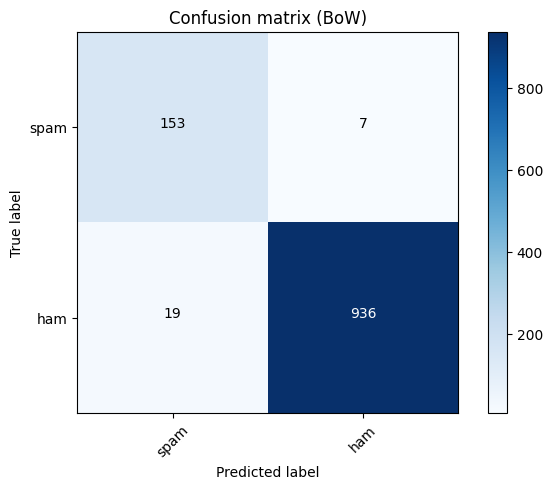

In [119]:
## confusion matrix ##
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['spam','ham'],normalize= False,  title='Confusion matrix (BoW)')

[[129  31]
 [  0 955]]
Confusion matrix, without normalization
[[129  31]
 [  0 955]]


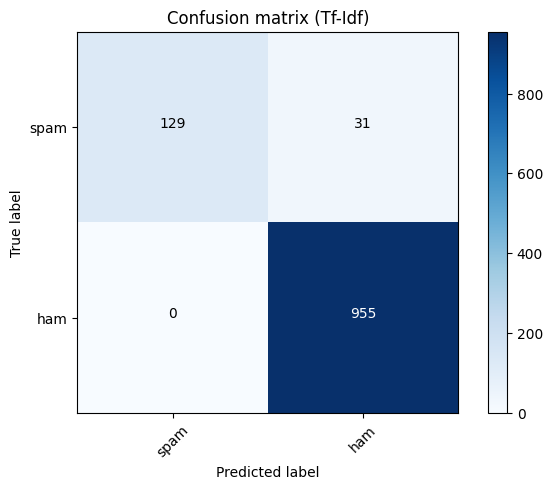

In [123]:
## confusion matrix ##
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y1_test, y_pred1, labels=[1,0]))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y1_test, y_pred1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['spam','ham'],normalize= False,  title='Confusion matrix (Tf-Idf)')

[[ 72  88]
 [  0 955]]
Confusion matrix, without normalization
[[ 72  88]
 [  0 955]]


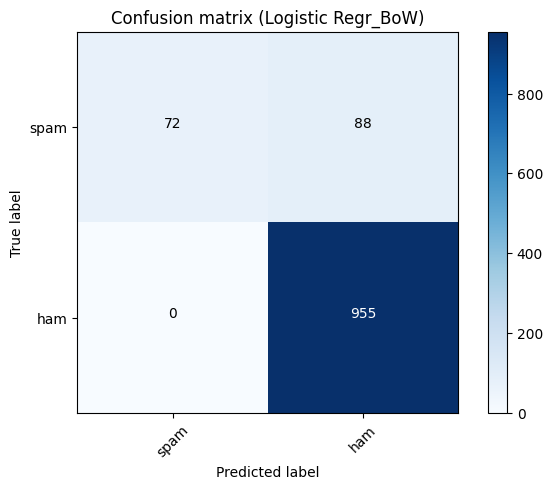

In [128]:
## confusion matrix ##
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['spam','ham'],normalize= False,  title='Confusion matrix (Logistic Regr_BoW)')

[[  0 160]
 [  0 955]]
Confusion matrix, without normalization
[[  0 160]
 [  0 955]]


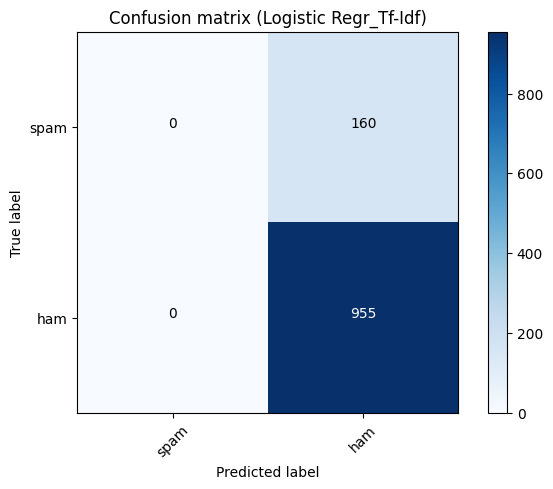

In [132]:
## confusion matrix ##
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y1_test, y_hat1, labels=[1,0]))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y1_test, y_hat1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['spam','ham'],normalize= False,  title='Confusion matrix (Logistic Regr_Tf-Idf)')

In [133]:
print("Results for BoW : ")
print(classification_report(y_test, y_pred))
print("--------------------------------------------------------")
print("Results for TfIdf : ")
print(classification_report(y1_test, y_pred1))
print("--------------------------------------------------------")
print("Results for Logistic Regr (BoW) : ")
print (classification_report(y_test, yhat))
print("--------------------------------------------------------")
print("Results for Logistic Regr (TfIdf) : ")
print (classification_report(y1_test, y_hat1))

Results for BoW : 
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       955
        True       0.89      0.96      0.92       160

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------------
Results for TfIdf : 
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       955
        True       1.00      0.81      0.89       160

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

--------------------------------------------------------
Results for Logistic Regr (BoW) : 
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       955
        True       1.00      0.45      0.62     

C:\Users\91626\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91626\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91626\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:

In [134]:
print("xx")

xx
